# Linear Regression using NN and Algorithm


In [ ]:
!pip install tensorflow numpy matplotlib seaborn tqdm


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Check for GPU
device_name = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print(f"Using device: {device_name}")


Using device: GPU


Load boston housing dataset and split it into test and train

In [6]:
from tensorflow.keras.datasets import boston_housing

# Load dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Normalize features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


Define the models


In [7]:
# Linear model
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[X_train.shape[1]])
])

# Neural network model
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [8]:
def train_model(model, X, y, epochs=100, lr=0.01, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(batch_size)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    loss_fn = tf.keras.losses.MeanSquaredError()

    history = []

    for epoch in tqdm(range(epochs), desc="Training"):
        epoch_loss = []

        for batch_X, batch_y in dataset:
            with tf.GradientTape() as tape:
                predictions = model(batch_X, training=True)
                loss = loss_fn(batch_y, predictions)

            grads = tape.gradient(loss, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            epoch_loss.append(loss.numpy())

        avg_loss = np.mean(epoch_loss)
        history.append(avg_loss)

    return history


In [9]:
print("\nTraining Linear Regression Model")
loss_linear = train_model(linear_model, X_train, y_train, epochs=100, lr=0.01)



Training Linear Regression Model


Training: 100%|██████████| 100/100 [00:25<00:00,  3.95it/s]


In [10]:

print("\nTraining Neural Network Model")
loss_nn = train_model(nn_model, X_train, y_train, epochs=100, lr=0.01)


Training Neural Network Model


Training: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


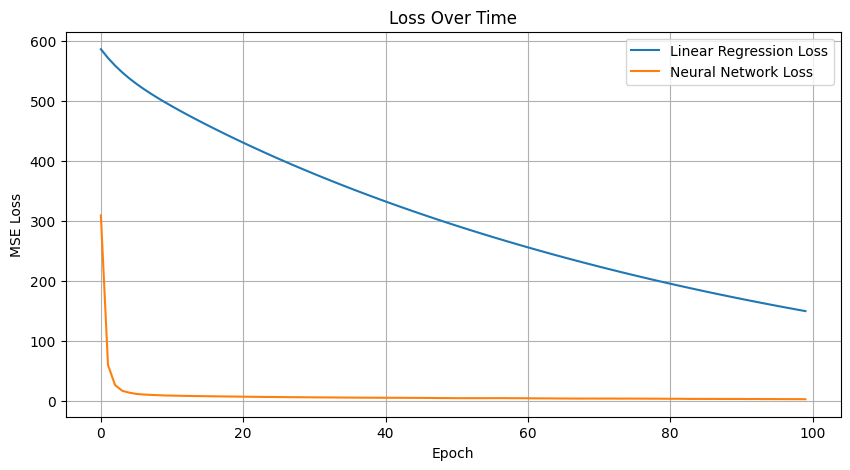

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(loss_linear, label="Linear Regression Loss")
plt.plot(loss_nn, label="Neural Network Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


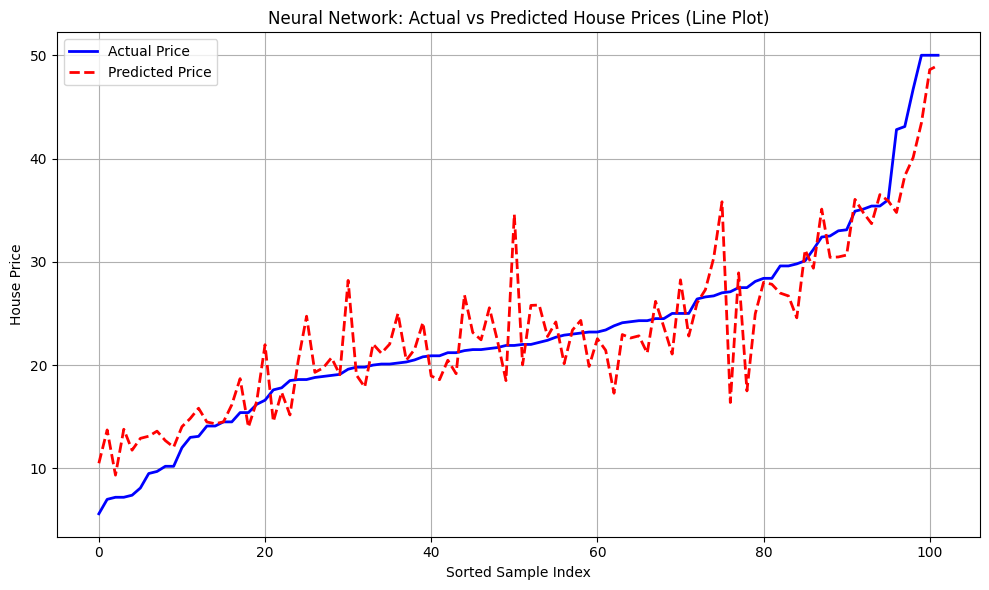

In [14]:
# Predict
y_pred_linear = linear_model.predict(X_test).flatten()
y_pred_nn = nn_model.predict(X_test).flatten()

# Sort by actual values for smoother comparison
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test[sorted_indices]
y_pred_nn_sorted = y_pred_nn[sorted_indices]  # Use neural net predictions

# Plot as lines
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Price', color='blue', linewidth=2)
plt.plot(y_pred_nn_sorted, label='Predicted Price', color='red', linestyle='--', linewidth=2)

plt.title("Neural Network: Actual vs Predicted House Prices (Line Plot)")
plt.xlabel("Sorted Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
